#EECS 504 PS1: Filtering

Please provide the following information 
(e.g. Andrew Owens, ahowens):

[Your first name] [Your last name], [Your UMich uniqname]




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file. We'll be running a command similar to: 
```
ipython nbconvert --to html ps1.ipynb  
```




# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [1]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import urllib.request

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

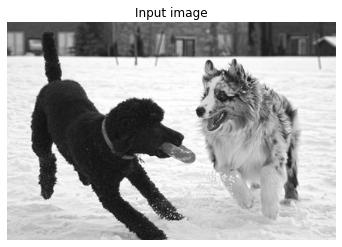

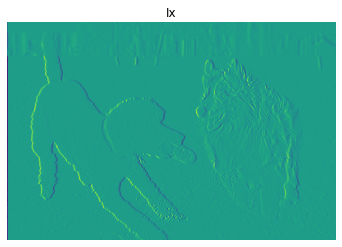

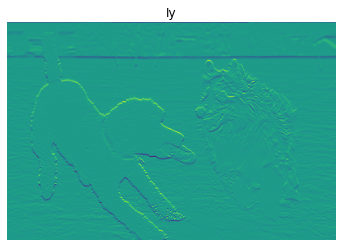

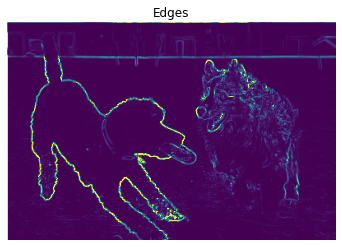

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

# Your code here!
dx=[[-1,1]]
dy=[[dx[j][i] for j in range(len(dx))] for i in range(len(dx[0]))] 
def convolve(im, h):
  new_im=np.zeros([len(im),len(im[0])])
  for m in range(len(im)):
    for n in range(len(im[0])):
      summing = 0
      for i in range(len(h)):
        for j in range(len(h[0])):
          if m - i < 0 or n - j < 0:
            summing = summing + 0 * h[i][j]
          else:
            summing = summing + im[m-i][n-j] * h[i][j]
      new_im[m][n] = summing
  return new_im


# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

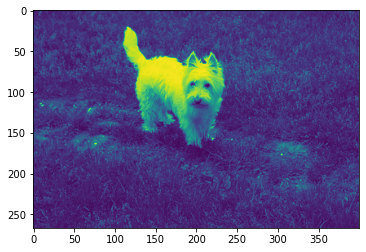

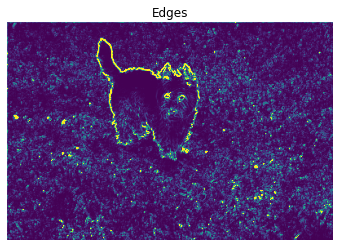

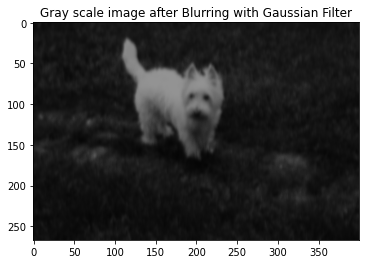

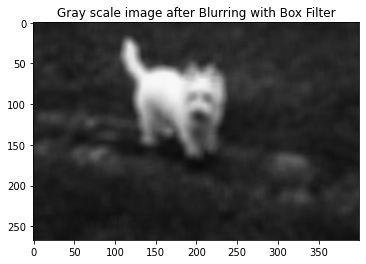

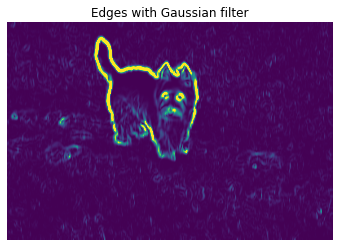

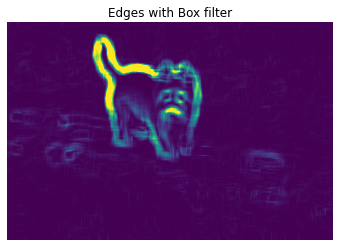

In [3]:
im = imageio.imread('dog-2.jpg').mean(2)/255.
plt.imshow(im)
dx_new=[[-1,1]]
dy_new=[[dx[j][i] for j in range(len(dx))] for i in range(len(dx[0]))]
Ix_new = convolve(im, dx_new)
Iy_new = convolve(im, dy_new)
edges_new = Ix_new**2 + Iy_new**2
plt.figure()
plt.title('Edges')
plt.axis('off')
plt.imshow(edges_new, vmin = 0., vmax = np.percentile(edges_new, 99))


#Add Gaussian filter
import math
w=11
x=list(map(int,np.zeros(w))) #broadcasting int to every element of np.zeros
m=0
i=int(w/2)
while i>=0:
  x[m]=i
  i=i-1
  m=m+1
j = 1
while m<w:
  x[m]=j
  j=j+1
  m = m + 1
y = x
std = 2
variance = std ** 2
coef = 1/(2 * math.pi * variance)
G = np.zeros([11,11])
col = 0
while col < w:
  for row in range(int(w/2)+1):
    G[col][row] = coef * math.exp(-(x[row]**2 + y[col]**2)/(2 * variance))
  col = col + 1
i=0
while i<=4:
  index=10-i
  G[index][:]=G[i][:]
  i=i+1

G_after_filter=scipy.ndimage.convolve(im,G) #convolving with Gaussian Filter
plt.figure()
plt.title('Gray scale image after Blurring with Gaussian Filter')
plt.imshow(G_after_filter,cmap = 'gray', vmin = 0, vmax = 1)

#Build up box filter
boxkernel = np.zeros([11,11])
for row in range(11):
  for col in range(11):
    boxkernel[row][col] = 1/(11**2)
B_after_filter=scipy.ndimage.convolve(im,boxkernel) #convolving with Gaussian Filter
plt.figure()
plt.title('Gray scale image after Blurring with Box Filter')
plt.imshow(B_after_filter,cmap = 'gray', vmin = 0, vmax = 1)

#Find edges after filtering
Ix_gaussian = scipy.ndimage.convolve(G_after_filter, dx)
Iy_gaussian = scipy.ndimage.convolve(G_after_filter, dy)
edges_gaussian = Ix_gaussian**2 + Iy_gaussian**2
plt.figure()
plt.title('Edges with Gaussian filter')
plt.axis('off')
plt.imshow(edges_gaussian, vmin = 0., vmax = np.percentile(edges_gaussian, 99))

Ix_box = scipy.ndimage.convolve(B_after_filter, dx)
Iy_box = scipy.ndimage.convolve(B_after_filter, dy)
edges_box = Ix_box**2 + Iy_box**2
plt.figure()
plt.title('Edges with Box filter')
plt.axis('off')
plt.imshow(edges_box, vmin = 0., vmax = np.percentile(edges_box, 99))

# Your code here!

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

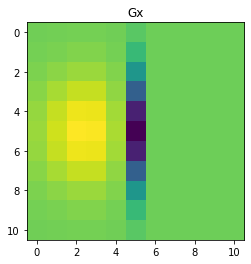

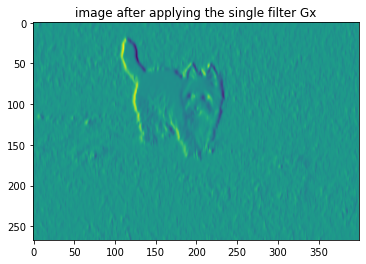

In [4]:
# Your code here!
from scipy.ndimage import convolve,gaussian_filter
Gx=scipy.ndimage.convolve(G,[[1,-1]])
ii=scipy.ndimage.convolve(im,Gx)

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

plt.figure()
plt.title('image after applying the single filter Gx')
plt.imshow(ii)

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

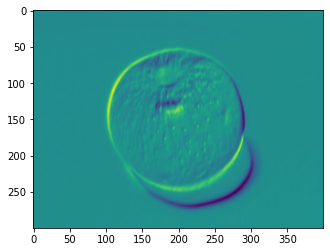

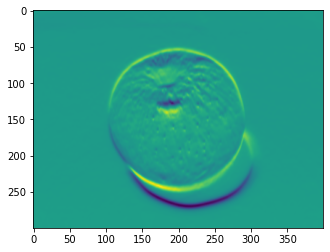

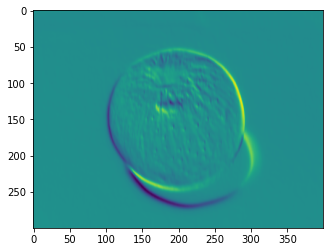

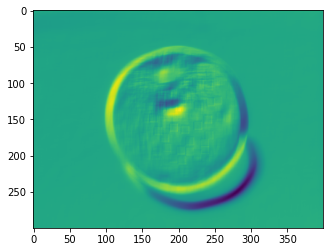

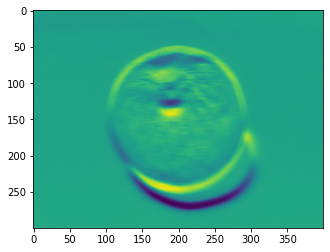

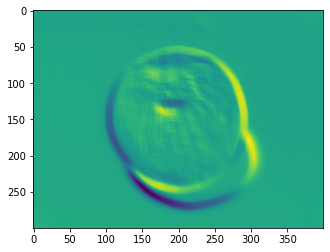

In [7]:
from scipy.ndimage import convolve,gaussian_filter
im = imageio.imread('apple.jpg').mean(2)/255.
def oriented_grad(Ix, Iy, theta):
  result = math.cos(theta) * Ix + math.sin(theta) * Iy
  return result

theta = [math.pi/4, math.pi/2, 3*math.pi/4]
G_filter = scipy.ndimage.convolve(im, G)
B_filter = scipy.ndimage.convolve(im, boxkernel)
Ix_gaussian_theta = scipy.ndimage.convolve(G_filter, dx)
Iy_gaussian_theta = scipy.ndimage.convolve(G_filter, dy)
Ix_box_theta = scipy.ndimage.convolve(B_filter, dx)
Iy_box_theta = scipy.ndimage.convolve(B_filter, dy)
for ele in theta:
  result_G = oriented_grad(Ix_gaussian_theta, Iy_gaussian_theta, ele)
  plt.figure()
  plt.imshow(result_G)

for ele in theta:
  result_B = oriented_grad(Ix_box_theta, Iy_box_theta, ele)
  plt.figure()
  plt.imshow(result_B)
# Your code here!